### Notes

In [1]:
# from patsy import dmatrics 
# y, X = dmatrices('log_gross ~ fb_score_norm_single_genre', data = df, return_type = 'dataframezx')

In [2]:
# pswd = getpass.getpass('Password:')

In [3]:
# engine = create_engine('postgresql://fernanhid:'+ pswd + '@52.91.115.173:5432/pets')

In [4]:
# prelim_data.to_sql('pet_training', engine, if_exists='replace')

In [5]:
# pd.read_sql_query(''' SELECT  name FROM pet_training''', engine)

## Just Run 

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, cross_validation, preprocessing, svm, linear_model, neighbors
import sklearn
from sqlalchemy import create_engine
import pandas as pd
import getpass



pd.options.mode.chained_assignment = None 
%matplotlib inline

In [273]:
prelim_data = pd.read_csv('animal_train.csv')

In [274]:
prelim_data.head(50)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


In [275]:
# [datetime.strptime((string_date), '%Y-%m-%d %H:%M:%S').hour for string_date in prelim_data.DateTime]

In [276]:
prelim_data.columns = [name.lower() for name in prelim_data.columns]

In [277]:
data = prelim_data[-prelim_data.sexuponoutcome.isnull()]

In [278]:
def to_days(column):
    age_list = []
    for age in column:  
        try:
            time_span = age.split(' ')[1]
            number = int(age.split(' ')[0])

            if time_span == 'years' or time_span == 'year':
                age_list.append(number * 365)
            elif time_span == 'months':
                age_list.append(number * 30)
            elif time_span == 'weeks' or time_span == 'week':
                age_list.append(number*7)
            else:
                age_list.append(number)
        except:
            age_list.append(age)
    return age_list 

In [279]:
data_age_list = to_days(data.ageuponoutcome[-data.ageuponoutcome.isnull()])
data_age_mean = np.mean(data_age_list)

In [280]:
data['age_in_days'] = to_days(data.ageuponoutcome.fillna(data_age_mean))

In [281]:
data['has_name'] = [1 if type(name) == str else 0 for name in data.name]

In [284]:
data['month'] = [datetime.strptime((string_date), '%Y-%m-%d %H:%M:%S').strftime('%b') for string_date in data.datetime]
data['year'] = [datetime.strptime((string_date), '%Y-%m-%d %H:%M:%S').strftime('%Y') for string_date in data.datetime]
#data['day'] = [datetime.strptime((string_date), '%Y-%m-%d %H:%M:%S').strftime('%d') for string_date in data.datetime]
data['weekday'] = [datetime.strptime((string_date), '%Y-%m-%d %H:%M:%S').strftime('%A') for string_date in data.datetime]
data['hour'] = [datetime.strptime((string_date), '%Y-%m-%d %H:%M:%S').hour for string_date in data.datetime]

In [285]:
data['sex'] = [status_sex if status_sex == 'Unknown' else status_sex.split(' ')[1] for status_sex in data.sexuponoutcome]

In [286]:
sterile_clean = [status_sex if status_sex == 'Unknown' else status_sex.split(' ')[0] for status_sex in data.sexuponoutcome]
data['sterile'] = ['Sterile' if status == 'Neutered' or status == 'Spayed' else status for status in sterile_clean]

In [287]:
data['if_female'] = [1 if sex == 'Female' else 0 for sex in data.sex]

In [288]:
data['if_dog'] = [1 if type_ == 'Dog' else 0 for type_ in data.animaltype]

In [289]:
month_dummies = pd.get_dummies(data['month'], prefix = 'month')
fertility_dummies = pd.get_dummies(data.sterile, prefix = 'fertility')
weekday_dummies = pd.get_dummies(data.weekday, prefix = 'weekday')

In [298]:
predict_data = data[['outcometype',  'age_in_days', 'hour', 'has_name', 'if_female', 'if_dog']].join([month_dummies,
                                                                                                    fertility_dummies,
                                                                                                    weekday_dummies])

In [299]:
predict_data.head()

,outcometype,age_in_days,hour,has_name,if_female,if_dog,month_Apr,month_Aug,month_Dec,month_Feb,...,fertility_Intact,fertility_Sterile,fertility_Unknown,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,Return_to_owner,365.0,18,1,0,1,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Euthanasia,365.0,12,1,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Adoption,730.0,12,1,0,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Transfer,21.0,19,0,0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Transfer,730.0,12,0,0,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Prediction

In [306]:
X_main = predict_data[predict_data.columns[predict_data.columns != 'outcometype']]
y_main = predict_data['outcometype']
X_train_main, X_test_main, y_train_main, y_test_main = cross_validation.train_test_split(X_main, y_main, test_size = .3)

## Random Forrest Classifier

In [307]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_main, y_train_main)
rf_pred_main = rf_clf.predict(X_test_main)

In [308]:
from sklearn.metrics import classification_report
print classification_report(y_test_main, rf_pred_main, labels = ['Adoption','Transfer', 'Return_to_owner','Euthanasia', 'Died' ])

             precision    recall  f1-score   support

   Adoption       0.69      0.76      0.72      3225
   Transfer       0.71      0.71      0.71      2826
Return_to_owner       0.44      0.40      0.42      1435
 Euthanasia       0.32      0.20      0.25       462
       Died       0.33      0.10      0.15        71

avg / total       0.63      0.64      0.63      8019



In [309]:
for i,outcome in enumerate(predict_data.outcometype.value_counts()):
    print predict_data.outcometype.value_counts().index[i]
    print float(outcome)/len(predict_data)

Adoption
0.402910805148
Transfer
0.3525142173
Return_to_owner
0.179025740796
Euthanasia
0.0581786890153
Died
0.0073705477402


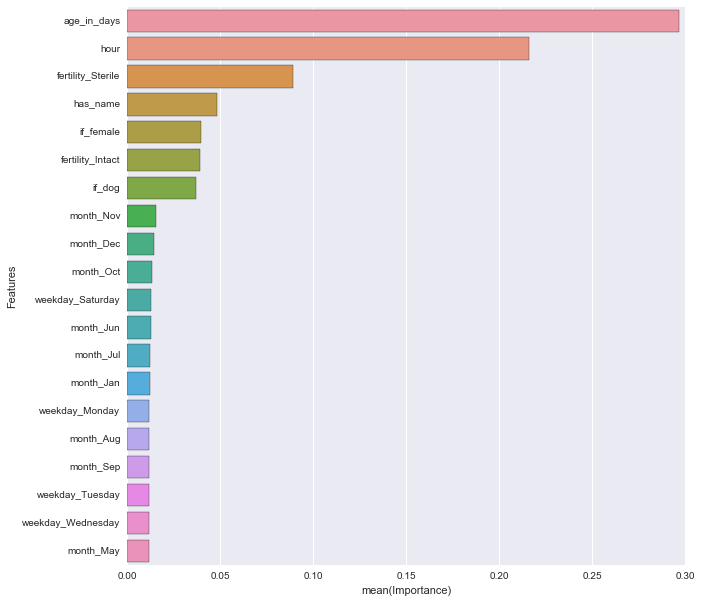

In [310]:
#Getting the Data Ready
features = X_main.columns
feature_importance = rf_clf.feature_importances_

importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importance})
importance_df.sort_values('Importance', inplace = True, ascending = False)

#Plotting the Graph

_ = sns.barplot(x = "Importance", y = "Features", data = importance_df.head(20), orient = "h")
_.figure.set_size_inches(10,10)

# Dual Model

## Cat Model

In [185]:
#domestic_short_hair = [1 if cat == 'Domestic Shorthair Mix' else 0 for cat in data[data.animaltype == 'Cat'].breed]

In [186]:
cat_data = predict_data[predict_data.if_dog == 0]
#cat_data['if_short_hair']  = domestic_short_hair

X_cat = cat_data[cat_data.columns[cat_data.columns != 'outcometype']]
y_cat = cat_data['outcometype']
X_train_cat, X_test_cat, y_train_cat, y_test_cat = cross_validation.train_test_split(X_cat, y_cat, test_size = .3)

In [187]:
cat_clf = RandomForestClassifier(n_estimators=15, criterion = 'gini', bootstrap = True)


#parameters = {'n_estimators':range(5,20,5), 'criterion':['gini', 'entropy'], 'bootstrap': [True, False]}
#cat_clf = sklearn.grid_search.GridSearchCV(cat_rf, parameters)
cat_clf.fit(X_train_cat, y_train_cat)
y_pred_cat = cat_clf.predict(X_test_cat)

In [188]:
from sklearn.metrics import classification_report
print classification_report(y_test_cat, y_pred_cat, labels = [ 'Transfer','Adoption', 'Euthanasia','Return_to_owner', 'Died' ])

             precision    recall  f1-score   support

   Transfer       0.78      0.85      0.82      1660
   Adoption       0.80      0.84      0.82      1284
 Euthanasia       0.30      0.15      0.21       200
Return_to_owner       0.27      0.13      0.18       156
       Died       0.23      0.07      0.11        41

avg / total       0.73      0.76      0.74      3341



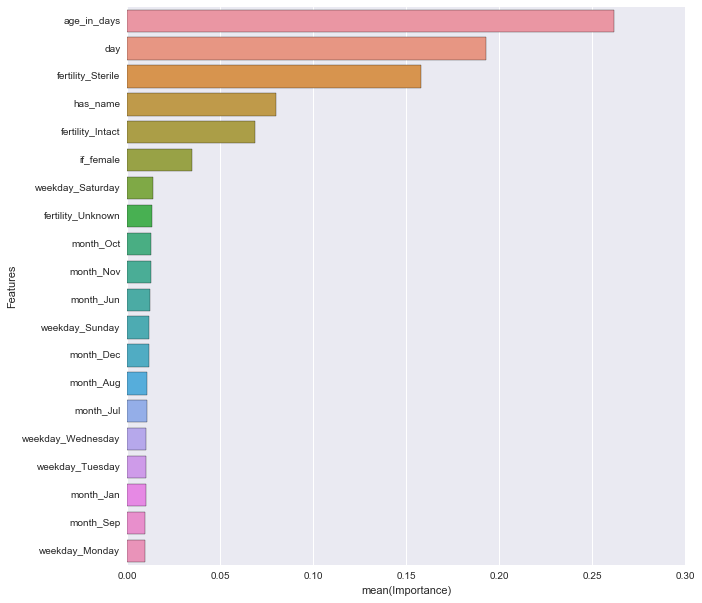

In [189]:
#Getting the Data Ready
features = X_cat.columns
feature_importance = cat_clf.feature_importances_

importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importance})
importance_df.sort_values('Importance', inplace = True, ascending = False)

#Plotting the Graph

_ = sns.barplot(x = "Importance", y = "Features", data = importance_df.head(20), orient = "h")
_.figure.set_size_inches(10,10)

In [190]:
from sklearn.metrics import classification_report
print classification_report(y_test_cat, y_pred_cat, labels = [ 'Transfer','Adoption', 'Euthanasia','Return_to_owner', 'Died' ])

             precision    recall  f1-score   support

   Transfer       0.78      0.85      0.82      1660
   Adoption       0.80      0.84      0.82      1284
 Euthanasia       0.30      0.15      0.21       200
Return_to_owner       0.27      0.13      0.18       156
       Died       0.23      0.07      0.11        41

avg / total       0.73      0.76      0.74      3341



In [191]:
for i,outcome in enumerate(cat_data.outcometype.value_counts()):
    print cat_data.outcometype.value_counts().index[i]
    print float(outcome)/len(cat_data)

Transfer
0.494431471169
Adoption
0.383689599425
Euthanasia
0.0637686366086
Return_to_owner
0.0449074905694
Died
0.0132028022274


## Dog Model

In [197]:
dog_data = predict_data[predict_data.if_dog == 1]
#dog_data['if_mix'] = [1 if 'Mix' in re.split('(\W)', ex) or '/' in re.split('(\W)', ex) else 0 for ex in data[data.animaltype == 'Dog'].breed]

X_dog = dog_data[dog_data.columns[dog_data.columns != 'outcometype']]
y_dog = dog_data['outcometype']
X_train_dog, X_test_dog, y_train_dog, y_test_dog = cross_validation.train_test_split(X_dog, y_dog, test_size = .3)

In [198]:
dog_clf = RandomForestClassifier(bootstrap= True, criterion= 'entropy', n_estimators= 15)
#parameters = {'n_estimators':range(5,20,5), 'criterion':['gini', 'entropy'], 'bootstrap': [True, False]}
#cat_clf = sklearn.grid_search.GridSearchCV(cat_rf, parameters)

dog_clf.fit(X_train_dog, y_train_dog)
dog_y_pred = dog_clf.predict(X_test_dog)

In [199]:
from sklearn.metrics import classification_report
print classification_report(y_test_dog, dog_y_pred, labels = ['Adoption', 'Return_to_owner', 'Transfer', 'Euthanasia', 'Died'])

             precision    recall  f1-score   support

   Adoption       0.61      0.64      0.63      1950
Return_to_owner       0.43      0.46      0.44      1298
   Transfer       0.50      0.46      0.48      1155
 Euthanasia       0.25      0.15      0.18       254
       Died       0.00      0.00      0.00        22

avg / total       0.51      0.52      0.51      4679



In [200]:
for i,outcome in enumerate(dog_data.outcometype.value_counts()):
    print dog_data.outcometype.value_counts().index[i]
    print float(outcome)/len(dog_data)

Adoption
0.416634603052
Return_to_owner
0.274785173785
Transfer
0.251186353726
Euthanasia
0.0541875080159
Died
0.00320636142106


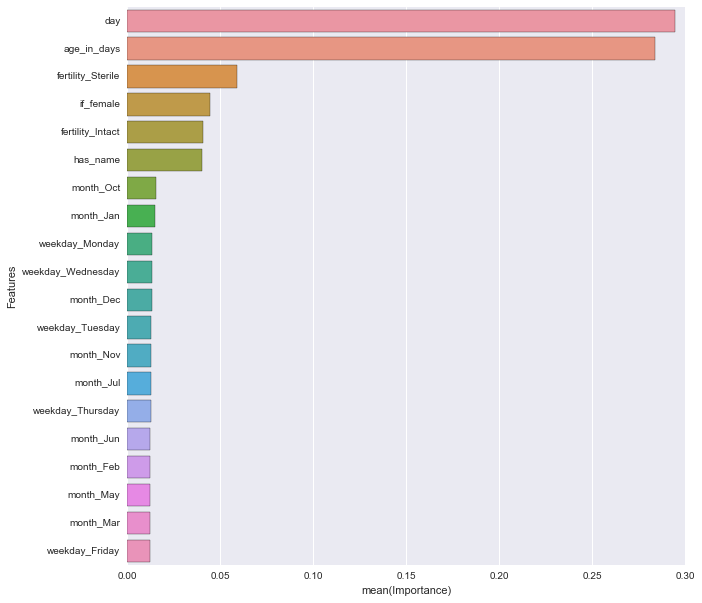

In [201]:
#Getting the Data Ready
features = X_dog.columns
feature_importance = dog_clf.feature_importances_

importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importance})
importance_df.sort_values('Importance', inplace = True, ascending = False)

#Plotting the Graph

_ = sns.barplot(x = "Importance", y = "Features", data = importance_df.head(20), orient = "h")
_.figure.set_size_inches(10,10)

## Both Models

In [202]:
X_combine = predict_data[predict_data.columns[predict_data.columns != 'outcometype']]
y_combine = predict_data['outcometype']
X_train_combine, X_test_combine, y_train_combine, y_test_combine = cross_validation.train_test_split(X_combine, y_combine, test_size = .3)

In [203]:
dual_model_pred_list = []
for i in range(len(X_test_combine)):
    if X_test_combine.iloc[i].if_dog == 0:
        dual_model_pred_list.append(cat_clf.predict(X_test_combine.iloc[i].reshape(1,-1))[0])
    elif X_test_combine.iloc[i].if_dog == 1:
        dual_model_pred_list.append(dog_clf.predict(X_test_combine.iloc[i].reshape(1,-1))[0])
        
dual_model_pred = np.array(dual_model_pred_list)

In [204]:
from sklearn.metrics import classification_report
print classification_report(y_test_combine, dual_model_pred, labels = ['Adoption', 'Transfer', 'Return_to_owner','Euthanasia', 'Died'])

             precision    recall  f1-score   support

   Adoption       0.86      0.88      0.87      3191
   Transfer       0.87      0.87      0.87      2852
Return_to_owner       0.75      0.76      0.75      1449
 Euthanasia       0.81      0.67      0.73       463
       Died       0.92      0.77      0.84        64

avg / total       0.84      0.84      0.84      8019



In [205]:
for i,outcome in enumerate(data.outcometype.value_counts()):
    print data.outcometype.value_counts().index[i]
    print float(outcome)/len(data)

Adoption
0.402910805148
Transfer
0.3525142173
Return_to_owner
0.179025740796
Euthanasia
0.0581786890153
Died
0.0073705477402


## If Statement with both dogs and cats models

## Compare that with one model with both

## For large amount of breeds do a threshhold and then call all the others others

# Kaggle Submission

In [315]:
test = pd.read_csv('animal_test.csv')

In [316]:
test.columns = [name.lower() for name in test.columns]

In [317]:
def to_days(column):
    age_list = []
    for age in column:  
        try:
            time_span = age.split(' ')[1]
            number = int(age.split(' ')[0])

            if time_span == 'years' or time_span == 'year':
                age_list.append(number * 365)
            elif time_span == 'months':
                age_list.append(number * 30)
            elif time_span == 'weeks' or time_span == 'week':
                age_list.append(number*7)
            else:
                age_list.append(number)
        except:
            age_list.append(age)
    return age_list

In [318]:
age_list = to_days(test.ageuponoutcome[-test.ageuponoutcome.isnull()])
age_mean = np.mean(age_list)

test['age_in_days'] = to_days(test.ageuponoutcome.fillna(age_mean))
test['has_name'] = [1 if type(name) == str else 0 for name in test.name]
test['month'] = [datetime.strptime((string_date), '%Y-%m-%d %H:%M:%S').strftime('%b') for string_date in test.datetime]
test['year'] = [datetime.strptime((string_date), '%Y-%m-%d %H:%M:%S').strftime('%Y') for string_date in test.datetime]
test['day'] = [datetime.strptime((string_date), '%Y-%m-%d %H:%M:%S').strftime('%d') for string_date in test.datetime]
test['weekday'] = [datetime.strptime((string_date), '%Y-%m-%d %H:%M:%S').strftime('%A') for string_date in test.datetime]
test['sex'] = [status_sex if status_sex == 'Unknown' else status_sex.split(' ')[1] for status_sex in test.sexuponoutcome]
sterile_clean = [status_sex if status_sex == 'Unknown' else status_sex.split(' ')[0] for status_sex in test.sexuponoutcome]
test['sterile'] = ['Sterile' if status == 'Neutered' or status == 'Spayed' else status for status in sterile_clean]
test['if_female'] = [1 if sex == 'Female' else 0 for sex in test.sex]
test['if_dog'] = [1 if type_ == 'Dog' else 0 for type_ in test.animaltype]

In [322]:
test_month_dummies = pd.get_dummies(test['month'], prefix = 'month')
test_fertility_dummies = pd.get_dummies(test.sterile, prefix = 'fertility')
test_weekday_dummies = pd.get_dummies(test.weekday, prefix = 'weekday')

submission_data =test[['age_in_days', 'day', 'has_name', 'if_female', 'if_dog']].join([test_month_dummies, 
                                                                                       test_fertility_dummies,
                                                                                      test_weekday_dummies])

## Lump Data Model

In [67]:
submission_pred = rf_clf.predict(submission_data)

In [68]:
blank_column = [0 for i in range(11456)]
submission_df = pd.DataFrame({'ID':range(1,11457), 
                              'Adoption': blank_column, 
                              'Died': blank_column, 
                              'Euthanasia': blank_column,
                             'Return_to_owner': blank_column,
                             'Transfer' :blank_column})[['ID',
                                                         'Adoption', 
                                                         'Died',
                                                         'Euthanasia', 
                                                         'Return_to_owner',
                                                         'Transfer']].set_index('ID')

In [69]:
for i in range(1,11457):
    column = submission_pred[i-1]
    submission_df.set_value(i, column, 1)

In [70]:
submission_df.to_csv('cv_kaggle_submission.csv')

## Both Models

In [323]:
submission_data.out

,age_in_days,day,has_name,if_female,if_dog,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,...,fertility_Intact,fertility_Sterile,fertility_Unknown,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,300.0,12,1,1,1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,730.0,26,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,365.0,13,1,0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,120.0,28,1,0,1,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,730.0,24,1,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [325]:
cat_submission_data = submission_data[submission_data.if_dog == 0]
dog_submission_data = submission_data[submission_data.if_dog == 1]

In [326]:
cat_submission_data

,age_in_days,day,has_name,if_female,if_dog,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,...,fertility_Intact,fertility_Sterile,fertility_Unknown,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
2,365.0,13,1,0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,4745.0,12,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,180.0,25,1,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18,1095.0,16,1,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19,1460.0,11,0,1,0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20,730.0,14,1,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21,21.0,04,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23,7.0,20,0,1,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25,365.0,29,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26,60.0,23,1,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [236]:
dual_model_submission_pred_list = []
for i in range(len(submission_data)):
    if submission_data.iloc[i].if_dog == 0:
        dual_model_pred_list.append(cat_clf.predict(submission_data.iloc[i].reshape(1,-1))[0])
    elif submission_data.iloc[i].if_dog == 1:
        dual_model_pred_list.append(dog_clf.predict(submission_data.iloc[i].reshape(1,-1))[0])
        
dual_model_submission_pred = np.array(dual_model_pred_list)

In [238]:
dual_model_submission_pred

array(['Transfer', 'Adoption', 'Adoption', ..., 'Transfer', 'Adoption',
       'Return_to_owner'], 
      dtype='|S15')

In [239]:
result=pd.DataFrame(dual_model_submission_pred, columns = submission_data.columns)
result.index += 1


ValueError: Shape of passed values is (1, 19475), indices imply (27, 19475)

In [80]:
blank_column = [0 for i in range(11456)]
dual_submission_df = pd.DataFrame({'ID':range(1,11457), 
                              'Adoption': blank_column, 
                              'Died': blank_column, 
                              'Euthanasia': blank_column,
                             'Return_to_owner': blank_column,
                             'Transfer' :blank_column})[['ID',
                                                         'Adoption', 
                                                         'Died',
                                                         'Euthanasia', 
                                                         'Return_to_owner',
                                                         'Transfer']].set_index('ID')

In [81]:
for i in range(1,11457):
    column = dual_model_submission_pred[i-1]
    dual_submission_df.set_value(i, column, 1)

In [82]:
dual_submission_df.head()

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
ID,,,,,
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,0,1
5,0,0,0,0,1


In [74]:
dual_submission_df.to_csv('grid_cv_kaggle_dual_model_submission.csv')